### Operacje kontekstowe

Ogólna formuła filtracji opiera się na następującym schemacie wykorzystującym splot (konwolucję):

### $I_{out} = \sum_{i, j \in jądro} k_{i,j} \cdot I_{in}(x+i, y+j)$

Najprostszą formą tak rozumianego filtru jest przekształcenie wykorzystujące jądra liniowe. Oznacza to, że nowa wartość punktu może być wyrażona jako suma ważona punktów jego otoczenia.

In [1]:
from skimage import data
import matplotlib.pyplot as plt

im = data.coins()

plt.figure(figsize=(5,5))
plt.imshow(im, cmap="gray")
plt.axis('off')
plt.show()

<Figure size 500x500 with 1 Axes>

In [2]:
def show2imgs(im1, im2, title1='Obraz pierwszy', title2='Obraz drugi', size=(10,10)):

    f, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(im1, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(im2, cmap='gray')
    ax2.axis('off')
    ax2.set_title(title2)
    plt.show()

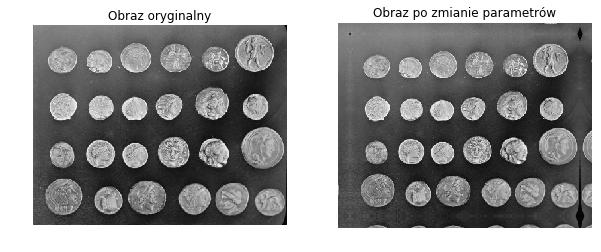

In [3]:
import cv2

size = 20
border = cv2.copyMakeBorder(im, size, size, size, size, cv2.BORDER_REFLECT, 255)

show2imgs(im, border, title1='Obraz oryginalny', title2='Obraz po zmianie parametrów', size=(10,10))

Dostępne mechanizmy replikacji są opisane w [dokumentacji](https://docs.opencv.org/3.0-rc1/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5).

#### Filtr prostokątny (dolnoprzepustowy)

(303, 384) float64
(303, 384) uint8


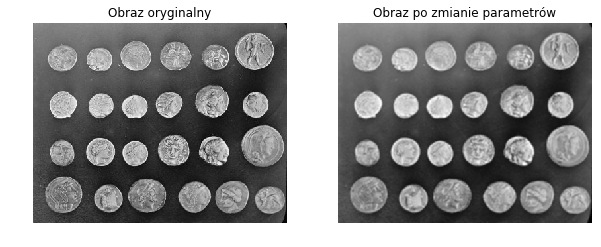

In [4]:
import warnings
warnings.filterwarnings('ignore')
from skimage import img_as_float, img_as_ubyte


imf = img_as_float(im)
print(imf.shape, imf.dtype)

imf = img_as_ubyte(imf)
print(imf.shape, imf.dtype)

bimf = cv2.blur(imf,  (3,3))

show2imgs(imf, bimf, title1='Obraz oryginalny', title2='Obraz po zmianie parametrów', size=(10,10))

#### Rozmycie gaussowskie

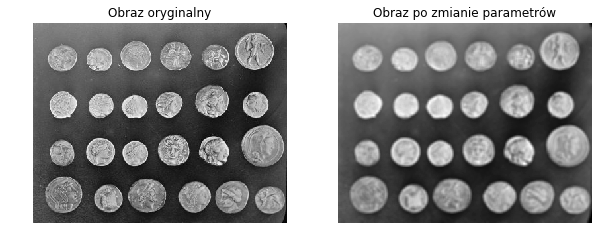

(303, 384) uint8


In [5]:
alpha = 1.0
beta = 60.0
gbimf = cv2.GaussianBlur(imf,  (5,5), 3.0)


show2imgs(imf, gbimf, title1='Obraz oryginalny', title2='Obraz po zmianie parametrów', size=(10,10))

print(gbimf.shape, gbimf.dtype)

#### Filtr medianowy

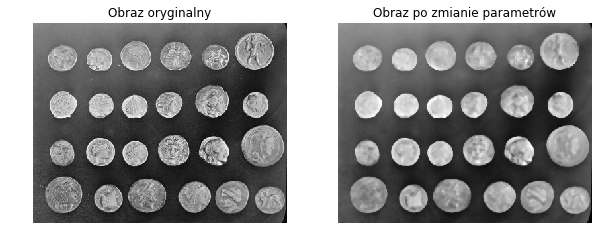

In [6]:
mbimf = cv2.medianBlur(imf,  5)

show2imgs(imf, mbimf, title1='Obraz oryginalny', title2='Obraz po zmianie parametrów', size=(10,10))

#### Filtr bilateralny

Podobnie jak filtr gaussowski oblicza on średnią ważoną każdego pikspela i otaczających go punktów. Wykorzystuje przy tym dwa współczynniki rozmycia. Pierwszy taki sam jak w wygładzaniu Gaussa. Drugi zależy nie od odległości piskeli sąsiadujących od punktu centralnego, ale od równicy intensywności (luminancji) względem piskela centralnego.

$$ I^{filtered} = \frac{1}{W_p} \sum_{x_i \in \Omega} I(x_i)f_{r}(\parallel I(x_i)-I(x)\parallel)g_{s}(\parallel x_i-x\parallel)$$

$$W_p = \sum_{x_i \in \Omega}f_{r}(\parallel I(x_i)-I(x)\parallel)g_{s}(\parallel x_i-x\parallel)$$

gdzie:
* $I$ - obraz wejściowy,
* $I^{filtered}$ - obraz wyjściowy,
* $x$- współrzędne punktu centralnego,
* $\Omega$ - otoczenie (maska) filtru,
* $f_r$ - funkacja określająca różnice wg intensywności (kernel) np. funkcja radialna (RBF, Gaussa)
* $g_s$ - funkacja określająca różnice wg położenia (kernel) np. funkcja radialna (RBF, Gaussa)

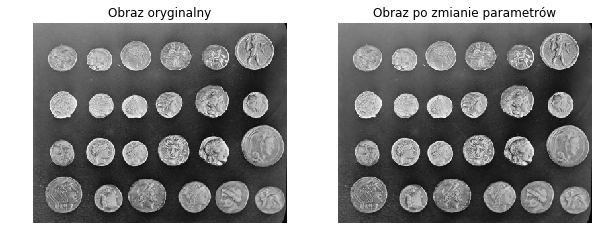

In [7]:
sigmaColor = 2.0
sigmaSpace = 3.0

bfimf = cv2.bilateralFilter(imf,  5, sigmaColor, sigmaSpace)
show2imgs(imf, bfimf, title1='Obraz oryginalny', title2='Obraz po zmianie parametrów', size=(10,10))